In [59]:
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)

In [60]:
data.raw <- read.csv('../data/WB_BGD_201805.csv')
data <- subset(data.raw, year >= 1986 & year <= 2015)
data.log <- log(data)

In [61]:
summary(data)
order = c('ISG', 'TO', 'TI', 'P_GDP', 'EI')
cor(data, use='pairwise')[order, order]

      year           ISG              TO            P_GDP       
 Min.   :1986   Min.   :20.05   Min.   :16.69   Min.   : 227.4  
 1st Qu.:1993   1st Qu.:22.86   1st Qu.:22.93   1st Qu.: 293.2  
 Median :2000   Median :23.92   Median :28.30   Median : 401.6  
 Mean   :2000   Mean   :24.07   Mean   :30.56   Mean   : 498.8  
 3rd Qu.:2008   3rd Qu.:25.90   3rd Qu.:39.48   3rd Qu.: 597.1  
 Max.   :2015   Max.   :28.15   Max.   :48.11   Max.   :1210.2  
                                                                
       EI               TI       
 Min.   :0.2049   Min.   : 93.0  
 1st Qu.:0.3205   1st Qu.:138.0  
 Median :0.3463   Median :291.0  
 Mean   :0.3513   Mean   :239.2  
 3rd Qu.:0.4179   3rd Qu.:317.5  
 Max.   :0.4893   Max.   :354.0  
 NA's   :1                       

,ISG,TO,TI,P_GDP,EI
ISG,1.0000000,0.9327355,0.7972720,0.8715645,-0.8552086
TO,0.9327355,1.0000000,0.8417575,0.8757430,-0.9187085
TI,0.7972720,0.8417575,1.0000000,0.6928933,-0.7820815
P_GDP,0.8715645,0.8757430,0.6928933,1.0000000,-0.9492223
EI,-0.8552086,-0.9187085,-0.7820815,-0.9492223,1.0000000


In [62]:
library(MVN)

In [63]:
model.naive <- 'EI ~ ISG + TO + TI + P_GDP'
model.naive.fit <- lm(model.naive, data=data.log)
AIC(model.naive.fit)
BIC(model.naive.fit)

[1] -117.4418

[1] -109.238

In [64]:
model.path <- '
## path model
EI ~ p_ei_isg*ISG + p_ei_to*TO + p_ei_ti*TI + p_ei_pgdp*P_GDP
TI ~ p_ti_isg*ISG
P_GDP ~ p_pgdp_to*TO
## indirect effect (a*b)
p_ei_ti_isg := p_ei_ti*p_ti_isg
p_ei_pgdp_to := p_ei_pgdp*p_pgdp_to
## total effect
p_ei_isg_total := p_ei_isg + (p_ei_ti*p_ti_isg)
p_ei_to_total := p_ei_to + (p_ei_pgdp*p_pgdp_to)
'

model.path.fit <- sem(model.path, data=data.log, estimator='MLF', missing='ML')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

lavaan 0.6-5 ended normally after 64 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            30
  Number of missing patterns                         2
                                                      
Model Test User Model:
                                                      
  Test statistic                                14.849
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.002

Model Test Baseline Model:

  Test statistic                               226.218
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.945
  Tucker-Lewis Index (TLI)            

In [65]:
soln.std <- standardizedSolution(model.path.fit, type='std.all', remove.def=FALSE)
soln.std

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EI,~,ISG,0.12182679,0.14379568,0.8472215,3.968717e-01,-0.160007564,0.40366115
EI,~,TO,0.07631719,0.16539022,0.4614371,6.444850e-01,-0.247841678,0.40047605
EI,~,TI,0.06639991,0.05277651,1.2581336,2.083434e-01,-0.037040159,0.16983997
EI,~,P_GDP,-1.21088741,0.10468954,-11.5664599,0.000000e+00,-1.416075143,-1.00569967
TI,~,ISG,0.80413801,0.10421405,7.7162148,1.199041e-14,0.599882219,1.00839379
P_GDP,~,TO,0.92482561,0.03853501,23.9996225,0.000000e+00,0.849298390,1.00035284
EI,~~,EI,0.01221976,0.00775111,1.5765170,1.149067e-01,-0.002972140,0.02741165
TI,~~,TI,0.35336207,0.16760496,2.1083032,3.500477e-02,0.024862387,0.68186175
P_GDP,~~,P_GDP,0.14469758,0.07127632,2.0300933,4.234705e-02,0.004998561,0.28439660


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.040e-01 -6.429e-04  0.000e+00  5.356e-03  2.000e-08  1.155e-01 

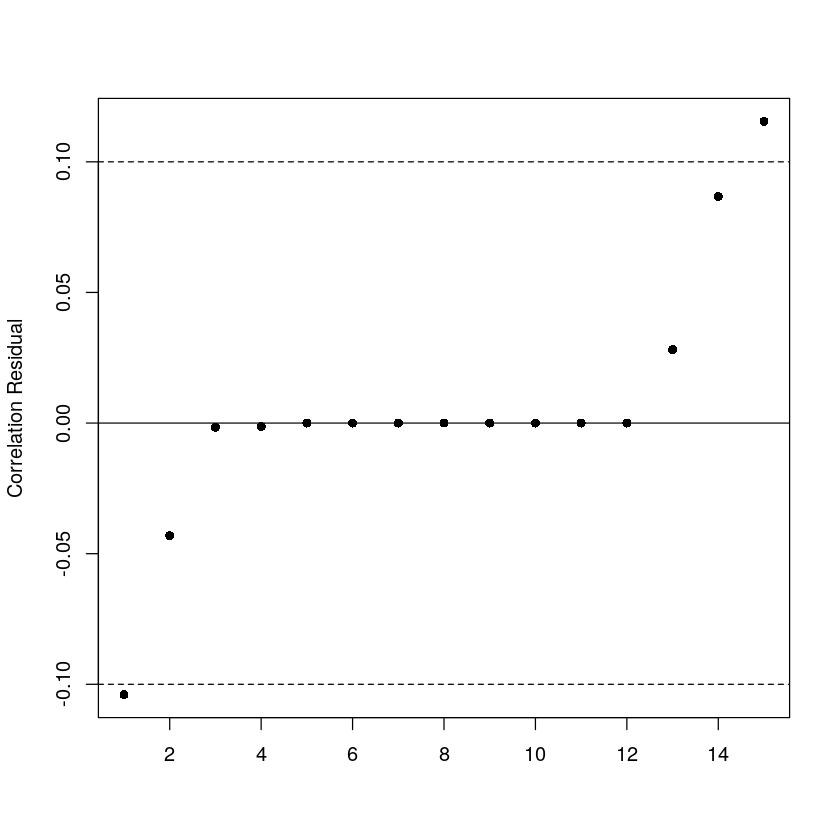

In [66]:
# Extract unique correlation residuals
fitCorResiduals <- resid(model.path.fit, type='cor')$cov
fitCorResidualsUnique <- fitCorResiduals[lower.tri(fitCorResiduals, diag=TRUE)]

summary(fitCorResidualsUnique)

plot(fitCorResidualsUnique[order(fitCorResidualsUnique)], pch=16,
  xlab='', ylab='Correlation Residual')
  abline(h=c(0, -.1, .1), lty=c(1,2,2)) 

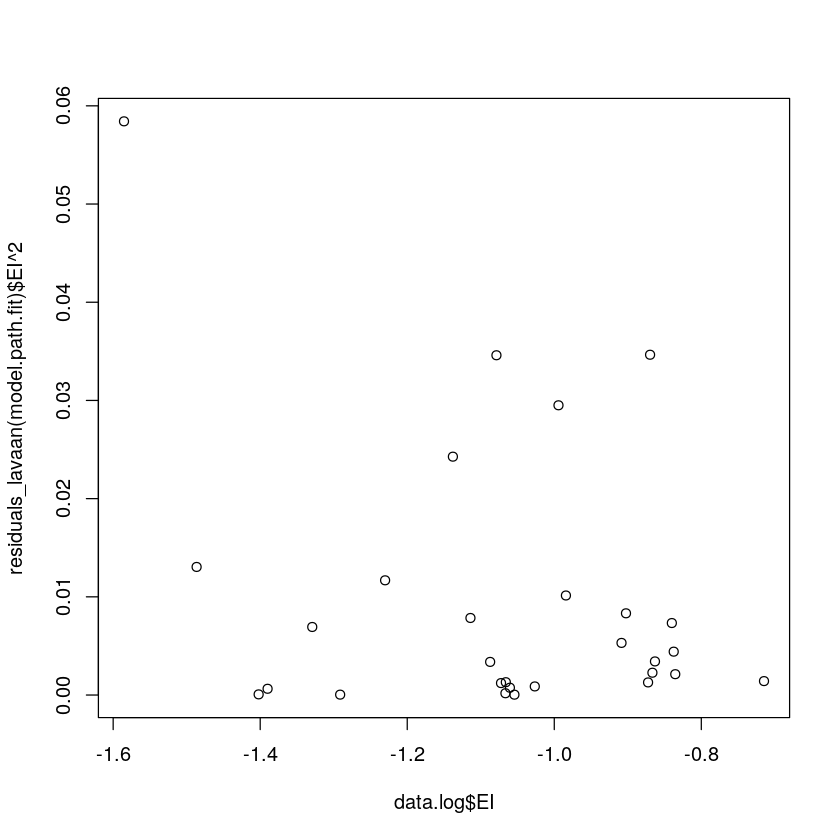

In [67]:
plot(data.log$EI, residuals_lavaan(model.path.fit)$EI^2)

In [68]:
varTable(model.path.fit)

,name,idx,nobs,type,exo,user,mean,var,nlev,lnam
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,EI,5,29,numeric,0,0,-1.067820,0.047188654,0,
2,TI,6,30,numeric,0,0,5.384996,0.212926913,0,
3,P_GDP,4,30,numeric,0,0,6.100348,0.215400099,0,
4,ISG,2,30,numeric,1,0,3.176422,0.009190374,0,
5,TO,3,30,numeric,1,0,3.366254,0.112704032,0,


In [69]:
resid(model.path.fit, type='raw')
resid(model.path.fit, type='cor')
resid(model.path.fit, type='normalized')


,EI,TI,P_GDP,ISG,TO
EI,-0.0011639553,-1.025529e-02,9.852928e-04,-7.542360e-04,5.949246e-04
TI,-0.0102552862,8.565976e-09,1.795527e-02,3.189953e-10,1.729568e-02
P_GDP,0.0009852928,1.795527e-02,-1.559723e-08,1.209796e-03,2.224280e-09
ISG,-0.0007542360,3.189953e-10,1.209796e-03,0.000000e+00,0.000000e+00
TO,0.0005949246,1.729568e-02,2.224280e-09,0.000000e+00,0.000000e+00


,EI,TI,P_GDP,ISG,TO
EI,-1.110223e-16,-1.039708e-01,-1.285723e-03,-4.310946e-02,-1.650847e-03
TI,-1.039708e-01,2.220446e-16,8.673152e-02,-9.273085e-09,1.154984e-01
P_GDP,-1.285723e-03,8.673152e-02,0.000000e+00,2.812850e-02,4.940609e-08
ISG,-4.310946e-02,-9.273085e-09,2.812850e-02,0.000000e+00,0.000000e+00
TO,-1.650847e-03,1.154984e-01,4.940609e-08,0.000000e+00,0.000000e+00


,EI,TI,P_GDP,ISG,TO
EI,-0.10406300,-4.031055e-01,4.863946e-02,-2.705480e-01,5.604061e-02
TI,-0.40310545,8.565976e-09,3.806484e-01,3.189953e-10,7.174738e-01
P_GDP,0.04863946,3.806484e-01,-1.559723e-08,2.711095e-01,2.224280e-09
ISG,-0.27054799,3.189953e-10,2.711095e-01,0.000000e+00,0.000000e+00
TO,0.05604061,7.174738e-01,2.224280e-09,0.000000e+00,0.000000e+00
